A implementação da árvore de decisão para classificação da sobrevivência dos passageiros do Titanic foi feita em Python, com auxílio da biblioteca sklearn, por meio do DecisionTreeClassifier.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.impute import KNNImputer

In [ ]:
dadosTreino = pd.read_csv("train.csv")
dadosValidacao = pd.read_csv("validation.csv")

# Análise Exploratória

In [ ]:
dadosTreino.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dadosValidacao.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


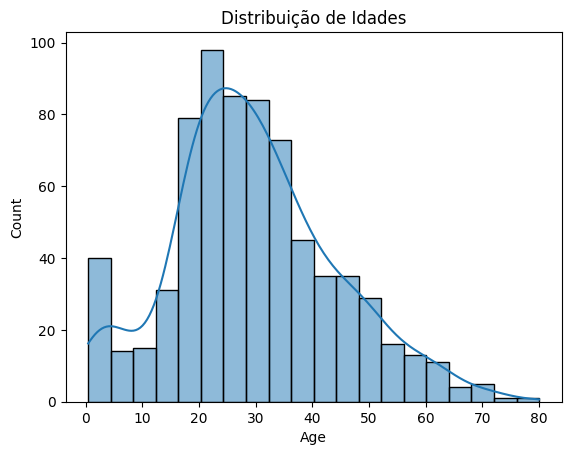

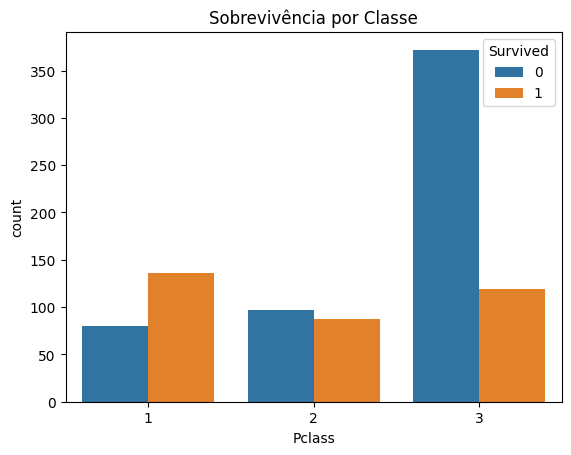

In [ ]:
sns.histplot(dadosTreino["Age"], bins=20, kde=True)
plt.title("Distribuição de Idades")
plt.show()

sns.countplot(x="Pclass", hue="Survived", data=dadosTreino)
plt.title("Sobrevivência por Classe")
plt.show()


# Pré-processamento dos dados

No pré-processamento de dados, foram feitos os seguintes ajustes:

1.   **Selação dos atributos relevantes**, já que haviam valores como Name, Ticket, Cabin e PassengerId, que ou não fariam diferença na classificação ou poderiam acabar introduzindo ruído.
2.   **Codificação de alguns dados categóricos em numéricos**, necessário para utilizar o DecisionTreeClassifier. Isso foi feito por meio da função Labelenconder(), que deu valores únicos para as variáveis Sex e Embarked.
3.  **Tratamentos dos valores nulos**, que são visiveis nos atributos Age, Embarked e Cabin (não relevante) dos dados originais. Por meio do .fillna(), os valores ausentes de Embarked receberam "S", e os de Age receberam a média das idades.




In [ ]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

entrada = dadosTreino[features]
saida = dadosTreino["Survived"]
entrada_validacao = dadosValidacao[features]

encoder = LabelEncoder()
entrada.loc[:, "Sex"] = encoder.fit_transform(entrada["Sex"])
entrada_validacao.loc[:, "Sex"] = encoder.transform(entrada_validacao["Sex"])

entrada.loc[:, "Embarked"] = encoder.fit_transform(entrada["Embarked"].fillna("S"))
entrada_validacao.loc[:, "Embarked"] = encoder.transform(entrada_validacao["Embarked"].fillna("S"))

entrada.loc[:, "Age"] = entrada["Age"].dropna()
entrada_validacao.loc[:, "Age"] = entrada_validacao["Age"].fillna(entrada_validacao["Age"].mean()).astype(float)

# Teste/Treino e Parametrização

A divisão dos dados foi feita em 80% para treino e 20% para teste. Dessa forma, foi possível testar a acurácia com dados que o modelo já teve acesso e com dados que ele não conhecia. Os valores parecidos, 0.86 e 0.85, ajudam a garantir que não teve overfitting.

Além disso, os parâmetros escolhidos para esse modelo foram:

1.   max_depth = 6, dentro do que é a média recomendada
2.   min_samples_leaf = 6, dentro do que é a média recomendada
1.   min_samples_split = 12, dentro do que é a média recomendada
2.   random_state = 1, só para garantir que é reproduzível

Como o DecisionTreeClassifier é baseado no CART, ao não estabeler um critério/metódo, ele usou automaticamente o GINI.

In [ ]:
entrada_treino, entrada_teste, saida_treino, saida_teste = train_test_split(entrada, saida, test_size=0.2, random_state=42)

modelo = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=12, random_state=1)
modelo.fit(entrada_treino, saida_treino)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=12,
                       random_state=1)

In [ ]:
saida_prevista = modelo.predict(entrada_treino)

acuracia_treino = modelo.score(entrada_treino, saida_treino)
acuracia_treino

0.8595505617977528

In [ ]:
saida_prevista = modelo.predict(entrada_teste)

acuracia_teste = modelo.score(entrada_teste, saida_teste)
acuracia_teste

0.8491620111731844

# Classificação das instâncias desconhecidas

Finalmente, após o treino da árvore e a observação das acurácias, foi feita a previsão/classificação para os dados de validação, que não tem o Survived. Os resultados obtidos foram guardados em result.csv e a árvore resultante pode ser vista logo abaixo por meio da figura e texto.

In [ ]:
saida_prevista = modelo.predict(entrada_validacao)

df_resultado = pd.DataFrame({"PassengerId": dadosValidacao["PassengerId"], "Survived": saida_prevista})
df_resultado.to_csv("result.csv", index=False)

resultado = pd.read_csv("result.csv")
pd.set_option("display.max_rows", None)  # Mostra todas as linhas
resultado

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


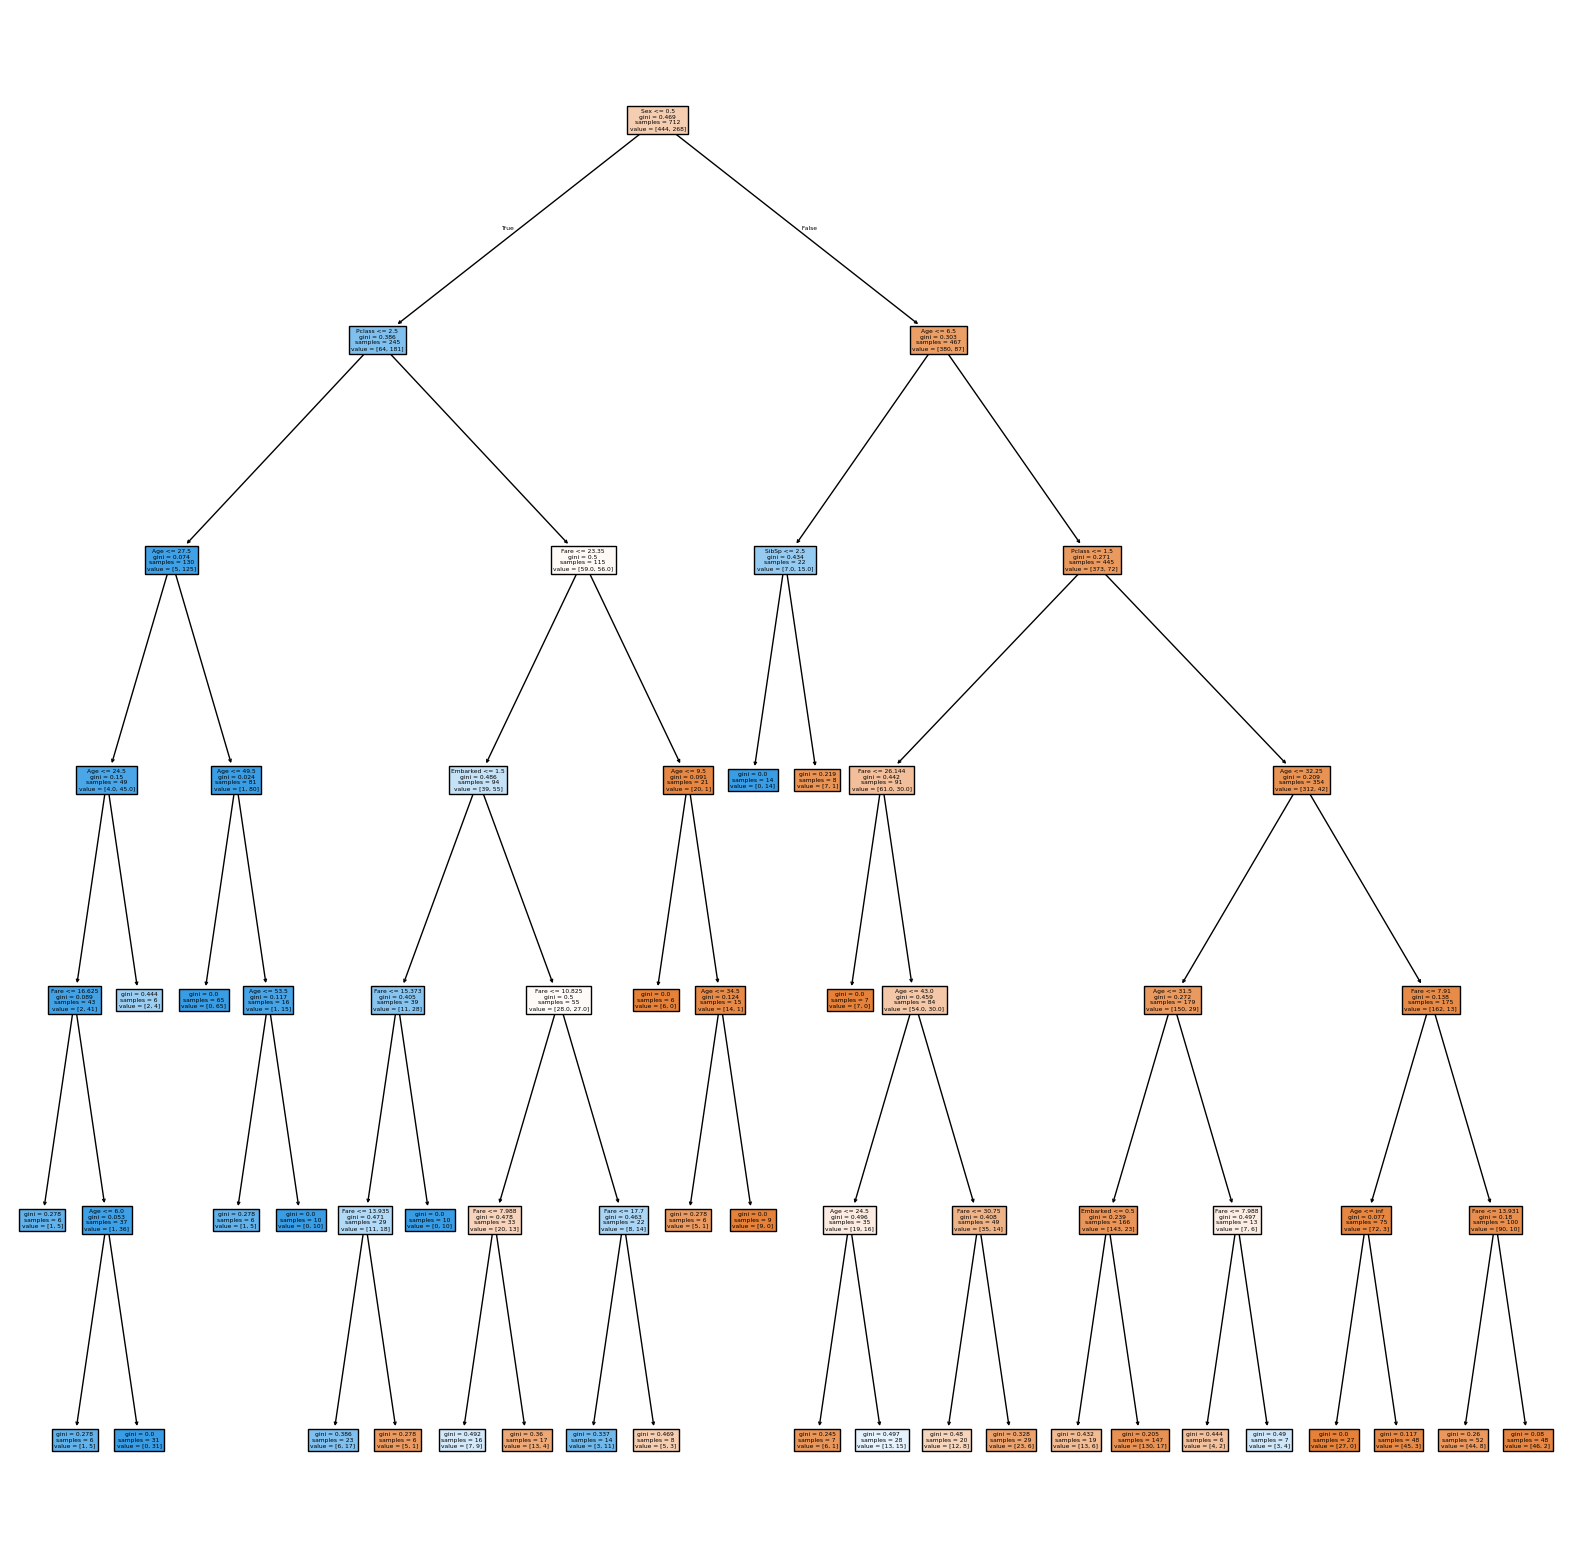

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(modelo, feature_names=features, filled=True)
plt.show()

In [ ]:
tree_rules = export_text(modelo, feature_names=features)
print(tree_rules)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 27.50
|   |   |   |--- Age <= 24.50
|   |   |   |   |--- Fare <= 16.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  16.62
|   |   |   |   |   |--- Age <= 6.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  6.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  24.50
|   |   |   |   |--- class: 1
|   |   |--- Age >  27.50
|   |   |   |--- Age <= 49.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  49.50
|   |   |   |   |--- Age <= 53.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  53.50
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Embarked <= 1.50
|   |   |   |   |--- Fare <= 15.37
|   |   |   |   |   |--- Fare <= 13.94
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  13.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  15.37
|   |   |   |   |   |--- cla

# Nova seção